# DATA 6550 Project #2
_Isaiah Osborne_

## Overview

I'm going to try and _accurately_ visualize survival rates across different genders for the Titanic.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as lines
import seaborn as sns

In [4]:
titanic = pd.read_csv("../../Data/titanic.csv")

In [5]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


We're going to try to look at the difference between survival rates for men and women. I'm going to try and break it down across age and whether these people traveled by themselves.

## Data Preparation

In [166]:
averageRateChildren = titanic[titanic["who"] == "child"]["survived"].mean()
averageRateWomen = titanic[titanic["who"] == "woman"]["survived"].mean()
averageRateMen = titanic[titanic["who"] == "man"]["survived"].mean()
print(f"Average survival rate for women: {averageRateWomen:.2%}")
print(f"Average survival rate for men: {averageRateMen:.2%}")

Average survival rate for women: 75.65%
Average survival rate for men: 16.39%


### Setup the Figure

In [ ]:
titanic["pclass"].unique()

3

In [133]:
classes = ["First Class", "Second Class", "Third Class"]

In [158]:
sns.set_style("white")

In [161]:
sns.color_palette("dark")

[(0.0, 0.10980392156862745, 0.4980392156862745),
 (0.6941176470588235, 0.25098039215686274, 0.050980392156862744),
 (0.07058823529411765, 0.44313725490196076, 0.10980392156862745),
 (0.5490196078431373, 0.03137254901960784, 0.0),
 (0.34901960784313724, 0.11764705882352941, 0.44313725490196076),
 (0.34901960784313724, 0.1843137254901961, 0.050980392156862744),
 (0.6352941176470588, 0.20784313725490197, 0.5098039215686274),
 (0.23529411764705882, 0.23529411764705882, 0.23529411764705882),
 (0.7215686274509804, 0.5215686274509804, 0.0392156862745098),
 (0.0, 0.38823529411764707, 0.4549019607843137)]

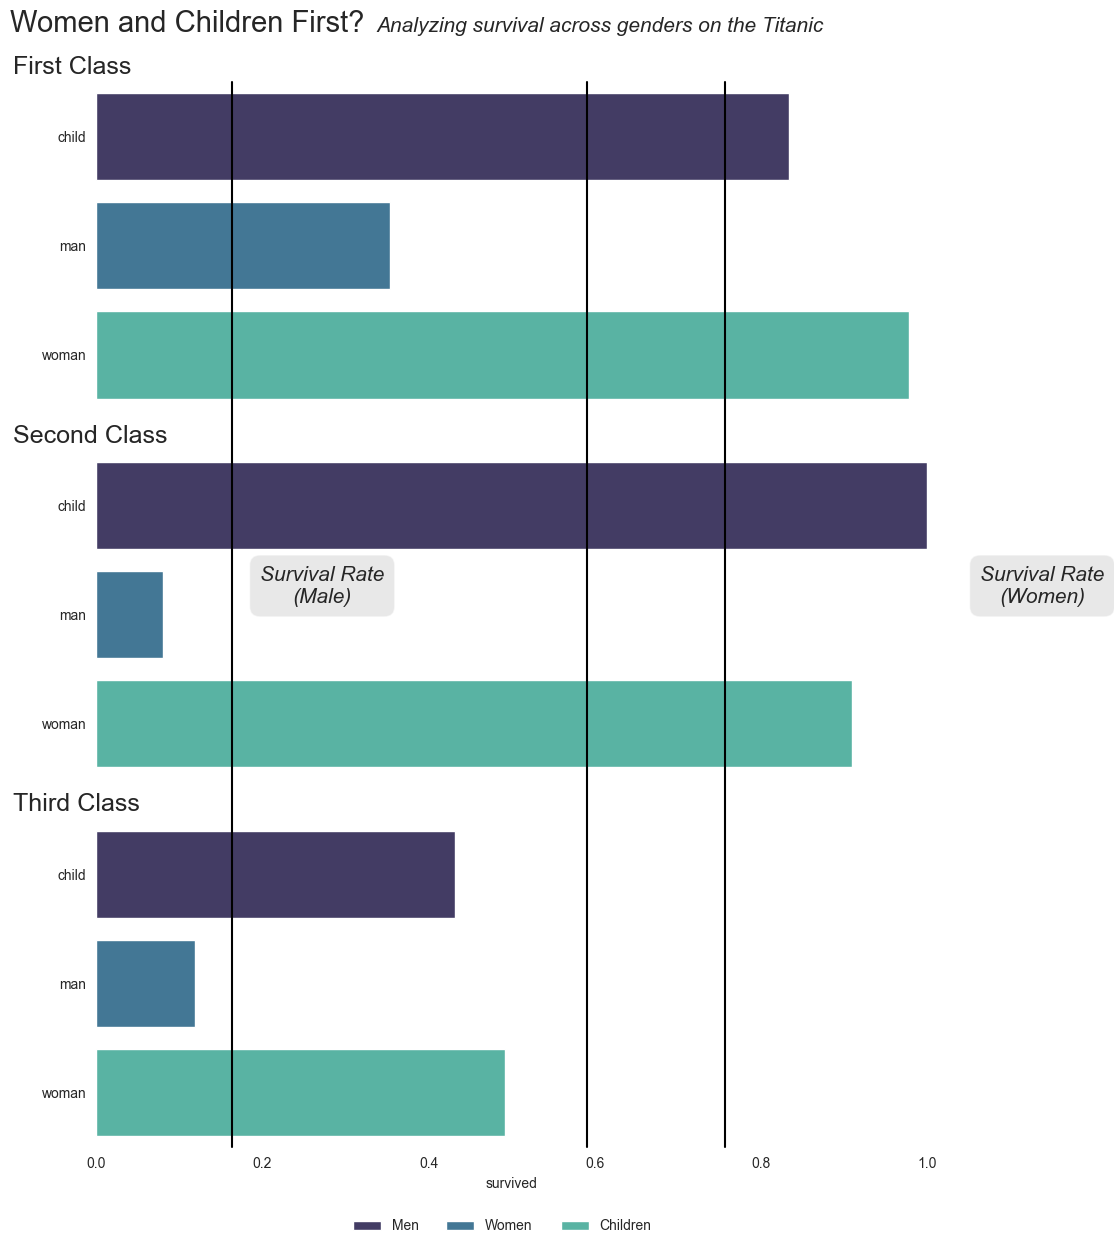

In [ ]:
figure, axis = plt.subplots(nrows=3)
figure.set_size_inches(9, 12)

# plt.tick_params(top='off', bottom='off', left='off', right="off")
figure.tight_layout()
for i in range(3):
    # filter the data (and sort so it's always consistent)
    filteredData = titanic[titanic["pclass"] == i + 1].sort_values("who")

    graph = sns.barplot(
        data=filteredData,
        x="survived",
        y="who",
        hue="who",
        ax=axis[i],
        errorbar=None,
        palette="mako",
    )

    graph.set_xlim((0, 1))

    graph.set_frame_on(False)
    graph.set_ylabel("")

    if i != 2:
        graph.get_xaxis().set_ticks([])
        graph.set_xlabel("")

    graph.set_title(classes[i], loc="left", x=-0.1, fontdict={"size": 18})

# https://stackoverflow.com/questions/45201514/how-to-edit-a-seaborn-legend-title-and-labels-for-figure-level-functions
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figlegend.html
plt.figlegend(
    title=None,
    loc="lower center",
    bbox_to_anchor=(0, -0.05, 1, 1),
    labels=["Men", "Women", "Children"],
    ncols=3,
    frameon=False,
)
figure.subplots_adjust(top=0.92)
# https://stackoverflow.com/questions/7066121/how-to-set-a-single-main-title-above-all-the-subplots
figure.suptitle("Women and Children First?", size=21, x=0.15)

figure.text(
    0.36,
    0.962,
    "Analyzing survival across genders on the Titanic",
    size=15,
    style="italic",
)

figure.text(
    0.3,
    0.5,
    "Survival Rate\n(Male)",
    ha="center",
    va="center",
    size=15,
    style="italic",
    bbox=dict(boxstyle="round,pad=0.5", fc="lightgray", alpha=0.5),
)

figure.text(
    1.1,
    0.5,
    "Survival Rate\n(Women)",
    ha="center",
    va="center",
    size=15,
    style="italic",
    bbox=dict(boxstyle="round,pad=0.5", fc="lightgray", alpha=0.5),
)

plt.show()

In [ ]:
# axis[0].set_title("How does gender affect survival rates?")

Bbox(x0=0.125, y0=0.6535294117647059, x1=0.9, y1=0.88)


AttributeError: Rectangle.set() got an unexpected keyword argument 'kind'

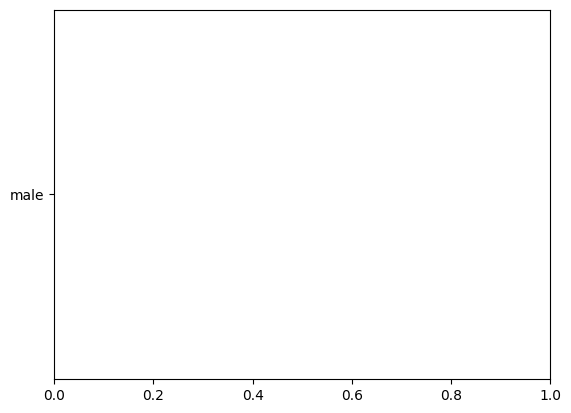